# Results for TENCON 2024 paper
## Experiment 2: Impact of Swarm Size

#### Title: Performance Analysis of Selected Swarm-based Robot Search Algorithms for Target Tracking 

#### Authors:

Christian C. Anabeza,
Marck Herzon C. Barrion,
Matthea Flynne T. Sim,
Argel A. Bandala

## Line Plots with Error Bars for Impact of Swarm Size

/tmp/ipykernel_9282/776249852.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df_random_walk, ci=None, marker='o', label='Random Walk', color=darker_palette['Random Walk'])


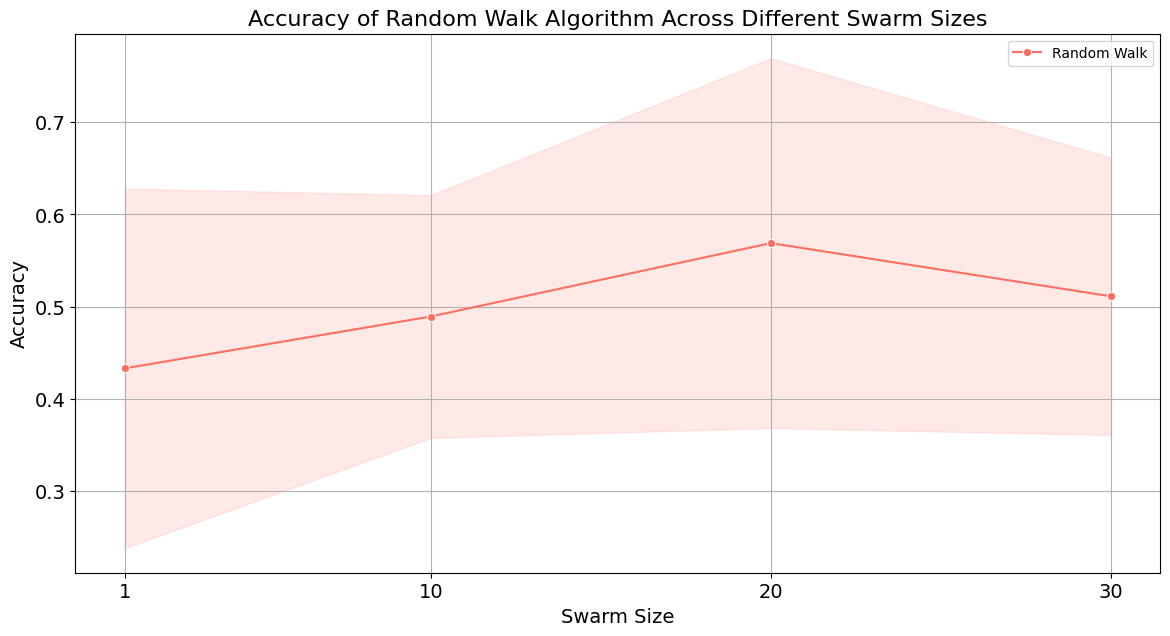

/tmp/ipykernel_9282/776249852.py:99: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Swarm Size', y='Accuracy', data=df_levy_flight, ci=None, marker='o', label='Levy Flight', color=darker_palette['Levy Flight'])


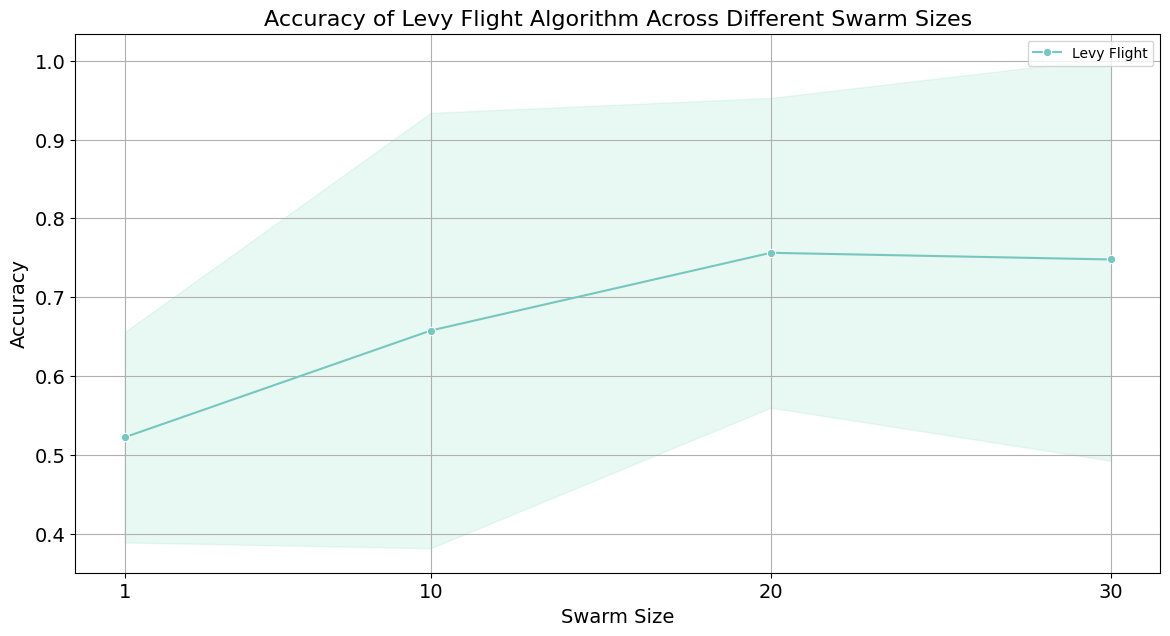

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Function to read accuracy data from a given directory
def read_accuracy_data(base_dir, actual_black_tiles, skip_lines=False):
    accuracies = []
    run_dirs = sorted(os.listdir(base_dir))

    for run_dir in run_dirs:
        run_path = os.path.join(base_dir, run_dir, 'e-puck.csv')
        if os.path.isfile(run_path):
            if skip_lines:
                df = pd.read_csv(run_path, skip_blank_lines=True)
            else:
                df = pd.read_csv(run_path)

            final_average_count = df['average_count'].iloc[-1]
            accuracy = final_average_count / actual_black_tiles
            accuracies.append(accuracy)
    
    return accuracies

# Directories for Random Walk
random_walk_dirs = {
    1: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_1bot_20targets",
    10: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_10bots_20targets",
    20: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_20bots_20targets",
    30: "/home/herzon/results-thesis/subthesis-3/raw_files/random_walk/outputs_30bots_20targets"
}

# Directories for Levy Flight
levy_flight_dirs = {
    1: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_1bot_20targets",
    10: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_10bots_20targets",
    20: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_20bots_20targets",
    30: "/home/herzon/results-thesis/subthesis-3/raw_files/levy_flight/outputs_30bots_20targets"
}

# Actual number of black tiles
actual_black_tiles = 20

# Collect accuracy data for Random Walk
random_walk_data = []

for swarm_size, dir_path in random_walk_dirs.items():
    accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=True)
    for accuracy in accuracies:
        random_walk_data.append({"Swarm Size": swarm_size, "Accuracy": accuracy})

# Collect accuracy data for Levy Flight
levy_flight_data = []

for swarm_size, dir_path in levy_flight_dirs.items():
    accuracies = read_accuracy_data(dir_path, actual_black_tiles, skip_lines=True)
    for accuracy in accuracies:
        levy_flight_data.append({"Swarm Size": swarm_size, "Accuracy": accuracy})

# Create DataFrames from the collected data
df_random_walk = pd.DataFrame(random_walk_data)
df_levy_flight = pd.DataFrame(levy_flight_data)

# Define a pastel color palette
pastel_palette = {
    "Random Walk": "#FFB7B2",  # Light pink
    "Levy Flight": "#B5EAD7",  # Light mint green
    "Brownian Motion": "#FFDAC1",  # Light peach
    "Correlated Random Walk": "#C7CEEA"  # Light lavender
}

# Define a darker color palette for the lines
darker_palette = {
    "Random Walk": "#FF6F61",  # Darker pink
    "Levy Flight": "#76C7C0",  # Darker mint green
    "Brownian Motion": "#FFA07A",  # Darker peach
    "Correlated Random Walk": "#9370DB"  # Darker lavender
}

# Plotting the accuracies for Random Walk
plt.figure(figsize=(14, 7))
sns.lineplot(x='Swarm Size', y='Accuracy', data=df_random_walk, ci=None, marker='o', label='Random Walk', color=darker_palette['Random Walk'])

# Adding error bars
means = df_random_walk.groupby('Swarm Size')['Accuracy'].mean()
stds = df_random_walk.groupby('Swarm Size')['Accuracy'].std()
plt.fill_between(means.index, means - stds, means + stds, color=pastel_palette['Random Walk'], alpha=0.3)

plt.title('Accuracy of Random Walk Algorithm Across Different Swarm Sizes', fontsize=16)
plt.xlabel('Swarm Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.xticks(ticks=[1, 10, 20, 30], fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plotting the accuracies for Levy Flight
plt.figure(figsize=(14, 7))
sns.lineplot(x='Swarm Size', y='Accuracy', data=df_levy_flight, ci=None, marker='o', label='Levy Flight', color=darker_palette['Levy Flight'])

# Adding error bars
means = df_levy_flight.groupby('Swarm Size')['Accuracy'].mean()
stds = df_levy_flight.groupby('Swarm Size')['Accuracy'].std()
plt.fill_between(means.index, means - stds, means + stds, color=pastel_palette['Levy Flight'], alpha=0.3)

plt.title('Accuracy of Levy Flight Algorithm Across Different Swarm Sizes', fontsize=16)
plt.xlabel('Swarm Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.xticks(ticks=[1, 10, 20, 30], fontsize=14)
plt.yticks(fontsize=14)
plt.show()
